In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import chain
import scipy.stats as stats

Load all data from both replicates.

In [2]:
sample_names = ['liquid', 'semisolid', 'small_spread', 'bead', 'large_spread']
counts = []

for sample in sample_names:
    for replicate in ['1', '2']:
        with open(f'../../data/20221211_counts/{sample}_{replicate}.pkl', 'rb') as f:
            clusters = pickle.load(f)
            for center in clusters:
                counts.append((sample, replicate, center, clusters[center].total()))

df = pd.DataFrame(counts, columns=['sample', 'rep', 'sequence', 'count'])

In [3]:
df.head()

,sample,rep,sequence,count
0,liquid,1,TTGTGTCTTGCATTGGCCGTGATTCTTCATTACAATTTGGATAACG...,84
1,liquid,1,TGTGCGCAATGTTCGGGGGGGGAGGCAGCGTATGAGTCGGTGCCAT...,83
2,liquid,1,CATTCCTTGCGCGGTAATAATTTTGTGCTTAAGATGTTCTTTGGCA...,81
3,liquid,1,AACCTCAGCGGATTGATGGCTAGTCCGTGTCTCATGTTCAAAGGGC...,80
4,liquid,1,CAAGAGGTTTAATATCTACTTTCATTTCGCTGCGCTTAAAAGATGA...,80


In [4]:
# from https://stackoverflow.com/questions/39512260/calculating-gini-coefficient-in-python-numpy
# Gini is the mean absolute difference of all value pairs, normalized by the value average
def gini_coefficient(x):
    """Compute Gini coefficient of array of values"""
    diffsum = 0
    for i, xi in enumerate(x[:-1], 1):
        diffsum += np.sum(np.abs(xi - x[i:]))
    return diffsum / (len(x)**2 * np.mean(x))

In [5]:
# sample_stats = []
# for rep in ['1', '2']:
#     for sample in sample_names:
#         sample_counts = df.loc[(df['rep'] == rep) & (df['sample'] == sample)]['count']
#         nobs, minmax, mean, var, skew, kurtosis = stats.describe(sample_counts)
#         gini = gini_coefficient(np.array(sample_counts))
#         median = np.median(sample_counts)
#         sample_stats.append((f'{sample}_{rep}', nobs, minmax[1], round(mean, 2), median, round(var, 2), round(skew, 2), round(kurtosis, 2), round(gini, 2)))
# sample_stats_df = pd.DataFrame(sample_stats, columns=['sample', 'unique seqs', 'max', 'mean', 'median', 'variance', 'skew', 'kurtosis', 'gini'])
# sample_stats_df

In [6]:
# sample_stats_df.to_csv("stats.csv")

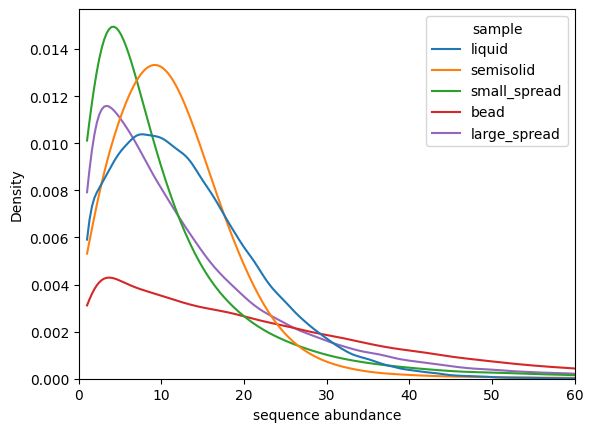

In [7]:
sns.kdeplot(data=df.loc[df['rep'] == '1'], x='count', hue='sample', clip=[1,60])
plt.xlim([0,60])
plt.xlabel("sequence abundance")
plt.savefig("images/rep1_kde.svg")

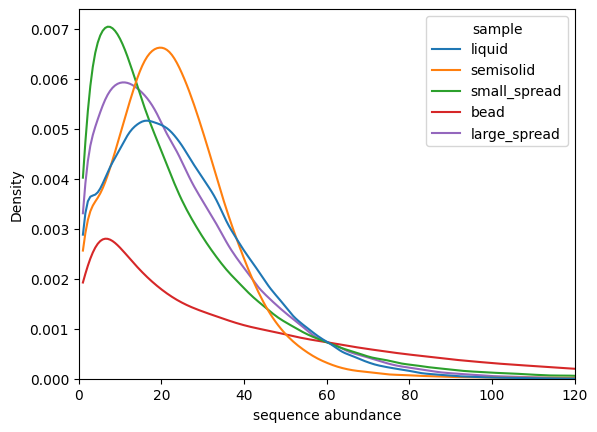

In [8]:
sns.kdeplot(data=df.loc[df['rep'] == '2'], x='count', hue='sample', clip=[1,120])
plt.xlim([0,120])
plt.xlabel("sequence abundance")
plt.savefig("images/rep2_kde.svg")

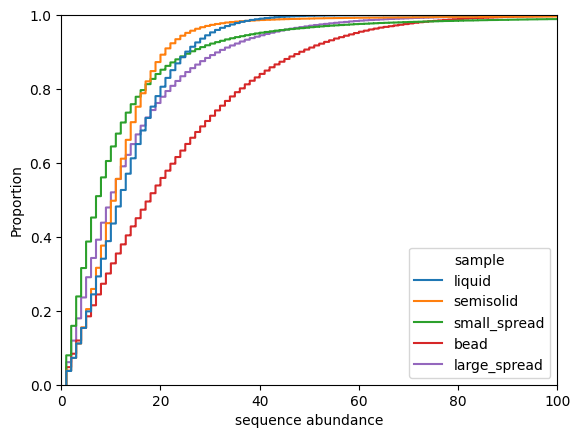

In [9]:
sns.ecdfplot(data=df.loc[df['rep'] == '1'], x='count', hue='sample')
plt.xlim([0,100])
plt.xlabel("sequence abundance")
plt.savefig("images/rep1_cdf.svg")

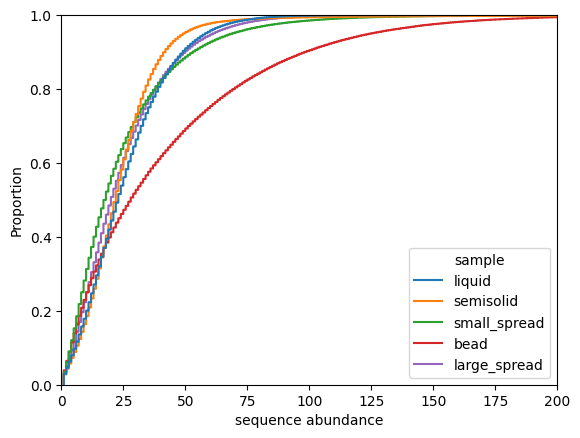

In [10]:
sns.ecdfplot(data=df.loc[df['rep'] == '2'], x='count', hue='sample')
plt.xlim([0,200])
plt.xlabel("sequence abundance")
plt.savefig("images/rep2_cdf.svg")

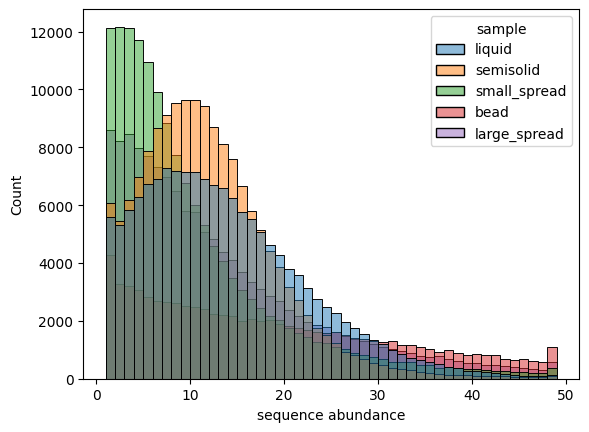

In [11]:
sns.histplot(data=df.loc[df['rep'] == '1'], x='count', hue='sample', bins=range(1,50))
plt.xlabel("sequence abundance")
plt.savefig("images/rep1_hist.svg")

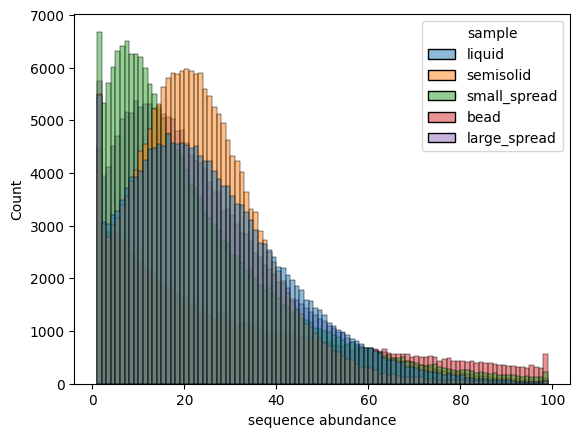

In [12]:
sns.histplot(data=df.loc[df['rep'] == '2'], x='count', hue='sample', bins=range(1,100))
plt.xlabel("sequence abundance")
plt.savefig("images/rep2_hist.svg")

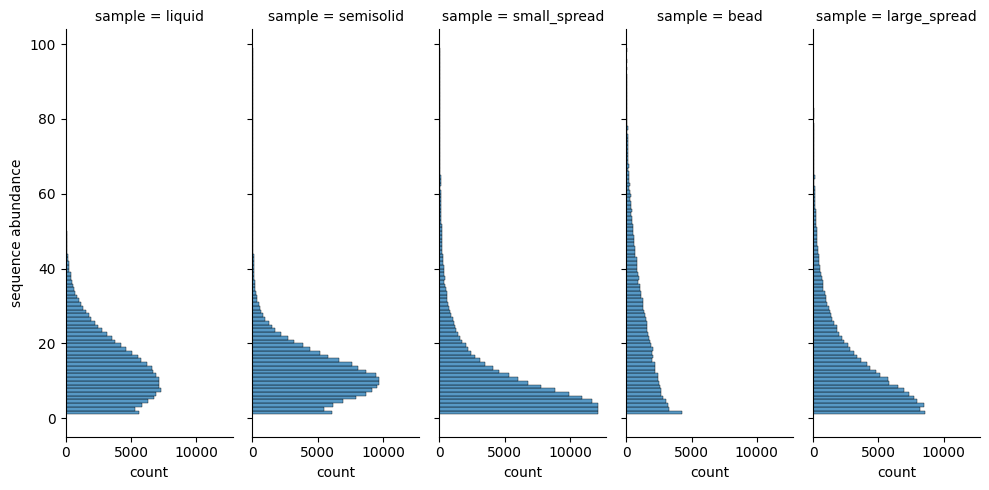

In [13]:
g = sns.displot(data=df.loc[df['rep'] == '1'], y='count', col='sample', aspect=.4, bins=range(100))
g.set_axis_labels("count", "sequence abundance")
g.savefig("images/rep1_displot.svg")

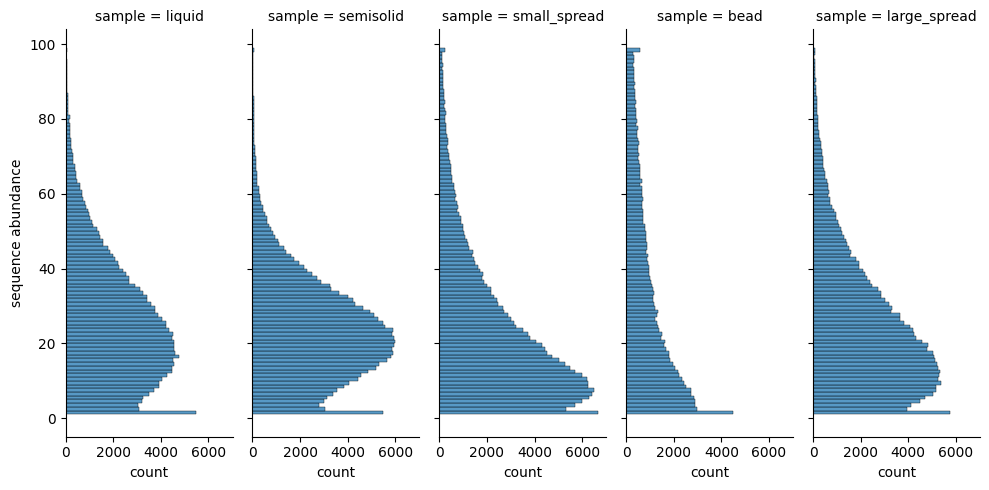

In [14]:
g = sns.displot(data=df.loc[df['rep'] == '2'], y='count', col='sample', aspect=.4, bins=range(100))
g.set_axis_labels("count", "sequence abundance")
g.savefig("images/rep1_displot.svg")

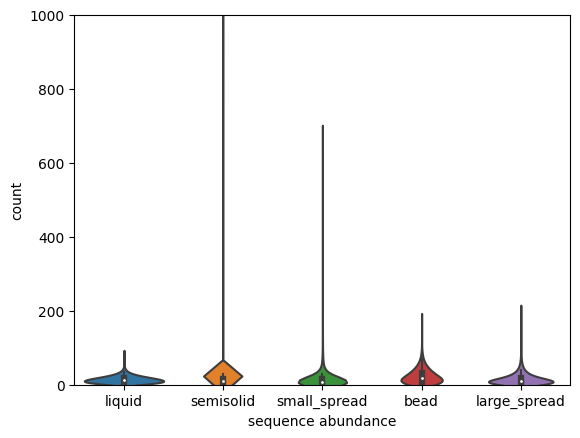

In [15]:
sns.violinplot(data=df.loc[df['rep'] == '1'], y='count', x='sample', bw=0.5)
plt.ylim([0,1000])
plt.xlabel("sequence abundance")
plt.savefig("images/rep1_violin.svg")

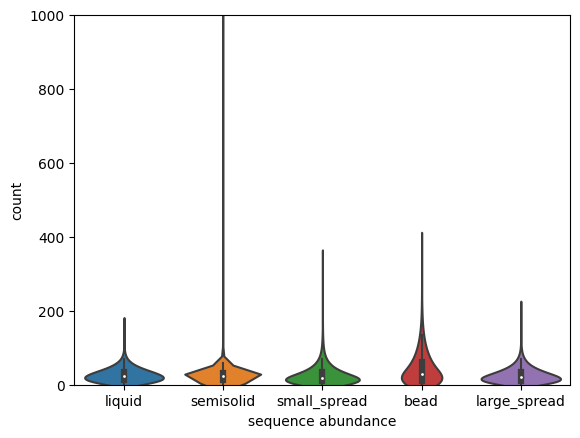

In [16]:
sns.violinplot(data=df.loc[df['rep'] == '2'], y='count', x='sample', bw=0.5)
plt.ylim([0,1000])
plt.xlabel("sequence abundance")
plt.savefig("images/rep2_violin.svg")

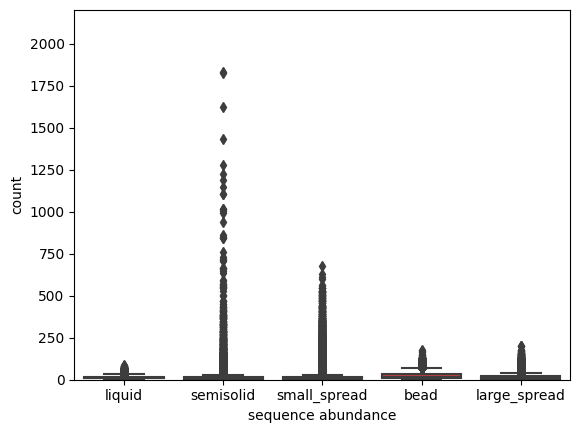

In [17]:
sns.boxplot(data=df.loc[df['rep'] == '1'], y='count', x='sample')
plt.ylim([0,2200])
plt.xlabel("sequence abundance")
plt.savefig("images/rep1_box.svg")

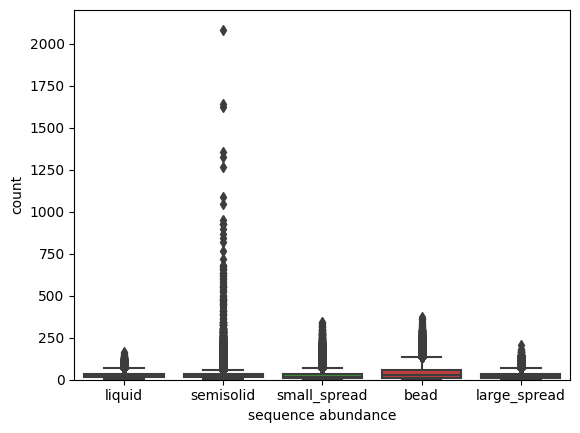

In [18]:
sns.boxplot(data=df.loc[df['rep'] == '2'], y='count', x='sample')
plt.ylim([0,2200])
plt.xlabel("sequence abundance")
plt.savefig("images/rep2_box.svg")

In [19]:
def label(x, color, label):
  ax = plt.gca()
  ax.text(0.3, 0.4, label, fontweight="bold", color=color,
      ha="left", va="center", transform=ax.transAxes)

def plot_ridge(df, max, name):
  sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

  # Initialize the FacetGrid object
  pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
  g = sns.FacetGrid(df, row="sample", hue="sample", aspect=5, height=1, palette=pal)

  # Draw the densities in a few steps
  g.map(sns.kdeplot, "count",
    bw_adjust=.5, clip=[1, max],
    fill=True, alpha=1, linewidth=1.5, cut=1)
  plt.xlim([0,max])
  g.map(sns.kdeplot, "count", clip_on=False, color="w", lw=2, bw_adjust=.5, clip=[1, max], cut=1)

  # passing color=None to refline() uses the hue mapping
  g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

  g.map(label, "count")

  # Set the subplots to overlap
  g.figure.subplots_adjust(hspace=-.4)

  # Remove axes details that don't play well with overlap
  g.set_titles("")
  g.set(yticks=[], ylabel="", xlabel="sequence abundance")
  g.despine(bottom=True, left=True)
  # plt.savefig(f"../../images/{name}.svg")

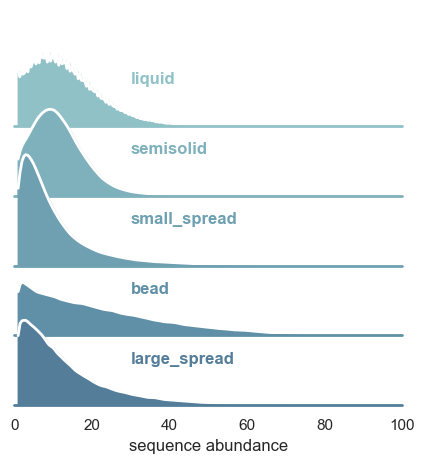

In [20]:
plot_ridge(df.loc[df['rep'] == '1'], 100, 'kde_stack_rep1')
plt.savefig("images/rep1_ridge.svg")

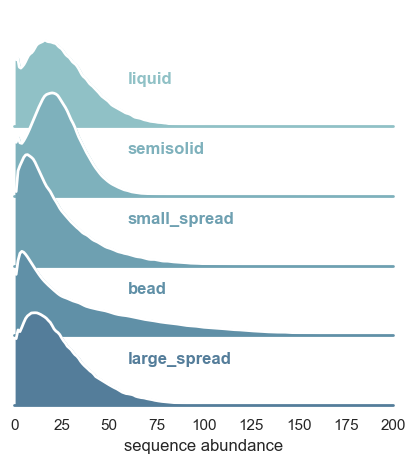

In [21]:
plot_ridge(df.loc[df['rep'] == '2'], 200, 'kde_stack_rep2')
plt.savefig("images/rep2_ridge.svg")

The semisolid samples have some extreme outliers with very high counts. Check what the sequences of these outliers are to make sure they're not something weird (e.g. all G).

In [31]:
df.loc[df['sample'] == 'semisolid'].head()

,sample,rep,sequence,count
335430,semisolid,1,GTGAAGGAGGCATGGGTATATATGTGCGGGAGGCTGATGAGTACCG...,4307
335431,semisolid,1,TATCGTCTGTGGTTTATTAGATCTGGGGATTACGACTTACTAGCAC...,1828
335432,semisolid,1,TCGACAAGTCTTTGCCTTTTCTAATGAGCCCTTAGATTTGTTTCCA...,1822
335433,semisolid,1,GGAGGGAGTACCATTGCTGTTCTGTTATGGCGACCATAGCGTATAT...,1622
335434,semisolid,1,CTTCATCGGATACGGCTGACCACAACAATAGTCTTTGAAGTGTTCT...,1431


In [36]:
print(df.loc[df['sample'] == 'semisolid'].reset_index().at[0, 'sequence'])
print(df.loc[df['sample'] == 'semisolid'].reset_index().at[1, 'sequence'])

GTGAAGGAGGCATGGGTATATATGTGCGGGAGGCTGATGAGTACCGTGCCATTTACGAGTGGTGAGACAGGAGGGGAGGG
TATCGTCTGTGGTTTATTAGATCTGGGGATTACGACTTACTAGCACCCTTGTGAGGTGATTATTTTCTTTATCTCTCTTC


In [23]:
df.loc[(df['sample'] == 'semisolid') & (df['rep'] == '2')].head()

,sample,rep,sequence,count
494467,semisolid,2,TCCGCGACAAAAGCTATTTCTTTTCCCTCAAGAATTGCATATATAT...,2377
494468,semisolid,2,TTTGTTTCGTTTTTGCGTCTATCGTCGGGGCTGGTCCGGAGCGTGC...,2081
494469,semisolid,2,TGGCCACATGTTCCGGGCCCTACTTTTAGGTTCCTAAAATTATCAG...,1639
494470,semisolid,2,TTTATTCCGGGTTTTCAAACGCGCGGGGTGTACTTCCCTCTTGTTC...,1621
494471,semisolid,2,TTTTATGACCTTTGATTCGATGGTCACATAAGCATGCTCAGGCTAC...,1352


In [37]:
print(df.loc[(df['sample'] == 'semisolid') & (df['rep'] == '2')].reset_index().at[0, 'sequence'])
print(df.loc[(df['sample'] == 'semisolid') & (df['rep'] == '2')].reset_index().at[1, 'sequence'])

TCCGCGACAAAAGCTATTTCTTTTCCCTCAAGAATTGCATATATATAGGTTTATTGCGGGGACCAAGTCTCCAGGTGGGA
TTTGTTTCGTTTTTGCGTCTATCGTCGGGGCTGGTCCGGAGCGTGCTACGGCTTATCAGGATGTACGCGGCATAAGTTCG


There doesn't seem to be anything particularly strange about these sequences.